In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

2023-11-19 04:57:22.407343: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import get_data
import get_model

In [3]:
dataset = get_data.get_dataset(
    "./data/next_day_wildfire_spread_eval*",
    data_size=64,
    sample_size=64,
    batch_size=100,
    num_in_channels=2,
    compression_type=None,
    include_frp=False
)

In [4]:
inputs, labels = next(iter(dataset))
print(inputs.shape)
print(labels.shape)

(100, 64, 64, 2)
(100, 64, 64, 1)


In [5]:
model = get_model.get_model((64, 64, 2))
model.load_weights("./models/no_frp_model.h5")

In [66]:
def get_preds(idx):
    preds = model.predict(inputs[idx:idx+1])[0]
    return inputs[idx, :, :, -1:], inputs[idx, :, :, :1], preds

In [67]:
inp, elev, pred = get_preds(0)

1/1 [==============================] - 0s 42ms/step


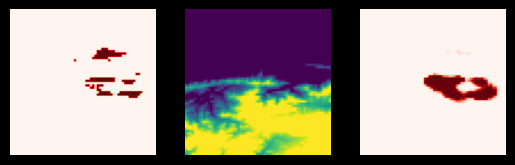

In [82]:
f = plt.figure()
f.patch.set_facecolor('black')
f.add_subplot(1,3, 1)
plt.axis('off')
plt.imshow(inp, cmap=colormaps["Reds"])
f.add_subplot(1,3, 2)
plt.axis('off')
plt.imshow(elev)
f.add_subplot(1,3, 3)
plt.axis('off')
plt.imshow(pred, cmap=colormaps["Reds"])
plt.show(block=True)